In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing,Holt,ExponentialSmoothing

In [2]:
df = pd.read_excel('Airlines+Data.xlsx')
df.head()

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121


In [3]:
df.isnull().sum()

Month         0
Passengers    0
dtype: int64

In [4]:
df.describe()

,Passengers
count,96.000000
mean,213.708333
std,71.918216
min,104.000000
25%,156.000000
50%,200.000000
75%,264.750000
max,413.000000


<AxesSubplot:>

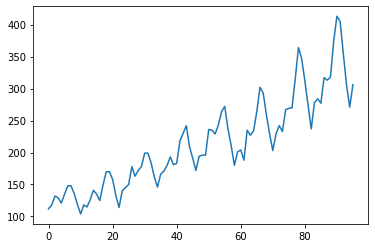

In [5]:
df.Passengers.plot()

In [6]:
X = df.head(80)
y = df.tail(16)

<AxesSubplot:>

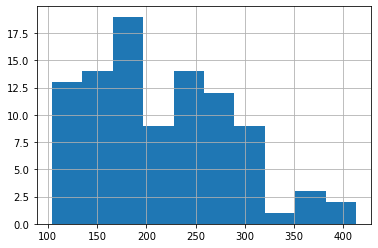

In [7]:
df['Passengers'].hist()

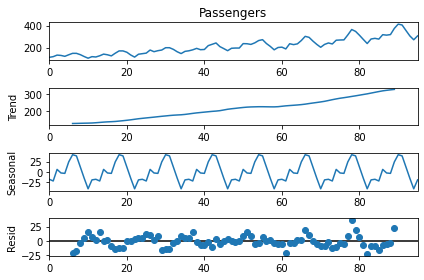

In [8]:
seasonal_ts_add=seasonal_decompose(df["Passengers"],period=12)
seasonal_ts_add.plot()
plt.show()

In [9]:
def MAPE(pred,org):
    temp = np.abs((pred-org)/org)*100
    return np.mean(temp)

#### Holt Winter Exponential Smoothing

#### Holts winter exponential smoothing with additive seasonality and additive trend

In [10]:
holt_winter_add = ExponentialSmoothing(X.Passengers,seasonal='add',trend='add',seasonal_periods=12).fit()
pred_holt_winter_add = holt_winter_add.predict(start=y.index[0],end=y.index[-1])
MAPE(pred_holt_winter_add,y.Passengers)

C:\Anaconda\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


7.6099745542819575

<AxesSubplot:>

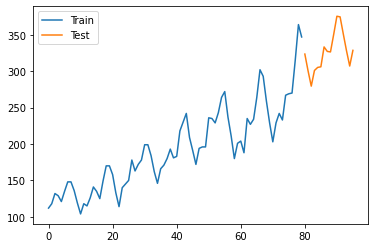

In [11]:
X['Passengers'].plot(legend=True,label='Train')
pred_holt_winter_add.plot(legend=True,label='Test')

#### Holts winter exponential smoothing with multiplicative seasonality and additive trend

In [12]:
holt_winter_mul = ExponentialSmoothing(X.Passengers,seasonal='mul',trend='add',seasonal_periods=12).fit()
pred_holt_winter_mul = holt_winter_mul.predict(start=y.index[0],end=y.index[-1])
MAPE(pred_holt_winter_mul,y.Passengers)

C:\Anaconda\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


3.2167504981916455

In [13]:
forecast_HW = holt_winter_mul.predict(start=len(df),end=len(df)+15)

<AxesSubplot:>

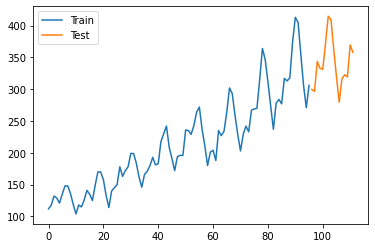

In [14]:
df['Passengers'].plot(legend=True,label='Train')
forecast_HW.plot(legend=True,label='Test')

In [15]:
import statsmodels.graphics.tsaplots as tsa_plots

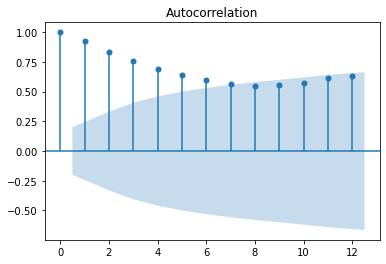

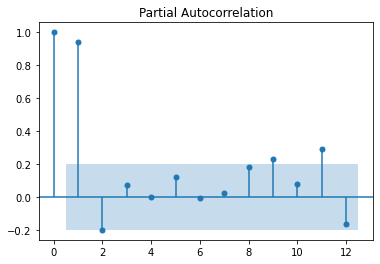

In [16]:
tsa_plots.plot_acf(df['Passengers'],lags=12)
tsa_plots.plot_pacf(df['Passengers'],lags=12)
plt.show()

#### According to the ACF & PACF, AR is probably will give best results but there is also seasonality.
#### So we will use SARIMAX model  to forecast.

#### SARIMA

In [17]:
from pmdarima import auto_arima

In [18]:
auto_arima(df['Passengers'],error_action='ignore',seasonal=True,m=12).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                   96
Model:             SARIMAX(1, 1, 0)x(1, 1, 0, 12)   Log Likelihood                -304.983
Date:                            Sat, 26 Mar 2022   AIC                            615.965
Time:                                    12:20:24   BIC                            623.222
Sample:                                         0   HQIC                           618.881
                                             - 96                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2250      0.099     -2.276      0.023      -0.419      -0.031
ar.S.L12      -0.2274      0.089     -2.548      0.011      -0.402      -0.052
sigma2        90.2700     14.667      6.155      0.000      61.524     119.016
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 2.23
Prob(Q):                              0.97   Prob(JB):                         0.33
Heteroskedasticity (H):               1.77   Skew:                             0.39
Prob(H) (two-sided):                  0.14   Kurtosis:                         2.79
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [19]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [20]:
model = SARIMAX(X['Passengers'],order=(1, 1, 0),seasonal_order=(1,1,0,12))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                         Passengers   No. Observations:                   80
Model:             SARIMAX(1, 1, 0)x(1, 1, 0, 12)   Log Likelihood                -247.473
Date:                            Sat, 26 Mar 2022   AIC                            500.947
Time:                                    12:20:24   BIC                            507.561
Sample:                                         0   HQIC                           503.564
                                             - 80                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2411      0.110     -2.200      0.028      -0.456      -0.026
ar.S.L12      -0.2724      0.096     -2.827      0.005      -0.461      -0.084
sigma2        93.1936     16.623      5.606      0.000      60.613     125.774
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 1.92
Prob(Q):                              0.95   Prob(JB):                         0.38
Heteroskedasticity (H):               2.48   Skew:                             0.40
Prob(H) (two-sided):                  0.04   Kurtosis:                         2.77
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [21]:
preds_sarima = results.predict(start=y.index[0],end=y.index[-1],type='levels')

<AxesSubplot:>

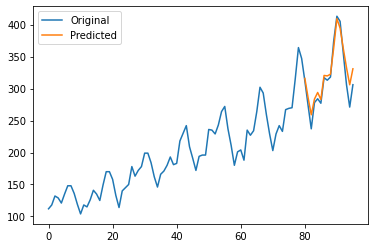

In [22]:
df['Passengers'].plot(legend=True,label='Original')
preds_sarima.plot(legend=True,label='Predicted')

In [23]:
MAPE(preds_sarima,y['Passengers'])

4.0812786469205005

#### Retraining on full model and forcasting

In [24]:
final_model = SARIMAX(df['Passengers'],order=(1, 1, 0),seasonal_order=(1,1,0,12))
final_results = final_model.fit()
forecast = final_results.predict(start=len(df),end=len(df)+15,type='levels')

In [25]:
forecast

96     314.174145
97     306.588343
98     345.253673
99     342.611199
100    346.703251
101    400.201952
102    441.475630
103    431.429371
104    384.839779
105    338.340741
106    302.886020
107    339.250182
108    346.930013
109    339.477398
110    378.446179
111    375.495058
Name: predicted_mean, dtype: float64

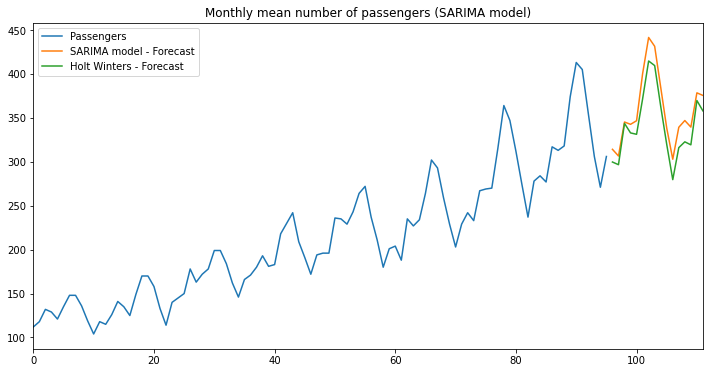

In [26]:
# Plot predictions against known values
title = 'Monthly mean number of passengers (SARIMA model)'
ylabel = ''
xlabel=''

ax = df['Passengers'].plot(legend=True,figsize=(12,6),title=title)
forecast.plot(legend=True,label='SARIMA model - Forecast')
forecast_HW.plot(legend=True,label='Holt Winters - Forecast')
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);